# Homework 3 - Improving the Pipeline
#### Author: Kunyu He, CAPP'20

In [1]:
import sys
sys.path.append('../codes/')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import viz

from featureEngineering import to_binary

In [3]:
INPUT_DIR = "../data/"
OUTPUT_DIR = "./images/"

In [4]:
%matplotlib inline

plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200

sns.set(style="white")

## 1. Load Data

Load data into our working environment. Do not skip rows that contain missing values.

In [5]:
project = viz.read_data(drop_na=False)

In [6]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124973 entries, 0 to 124972
Data columns (total 27 columns):
projectid                                 124973 non-null object
teacher_acctid                            124973 non-null object
schoolid                                  124973 non-null object
school_ncesid                             115740 non-null float64
school_latitude                           124973 non-null float64
school_longitude                          124973 non-null float64
school_city                               124973 non-null object
school_state                              124973 non-null object
school_metro                              109749 non-null object
school_district                           124801 non-null object
school_county                             124973 non-null object
school_charter                            124973 non-null object
school_magnet                             124973 non-null object
teacher_prefix                           

In [19]:
NUMERICAL = ['school_latitude', 'school_longitude', 'students_reached',
             'total_price_including_optional_support']
BINARY_ORDINAL = ['school_charter', 'school_magnet', 'poverty_level', 'grade_level',
                  'eligible_double_your_impact_match']
TARGET = ['fully_funded']

## 2. EDA

### 2.1 Categorical Variables - Bar Charts

Check the frequencies of the discrete variables. First check the target `fullyfunded`.

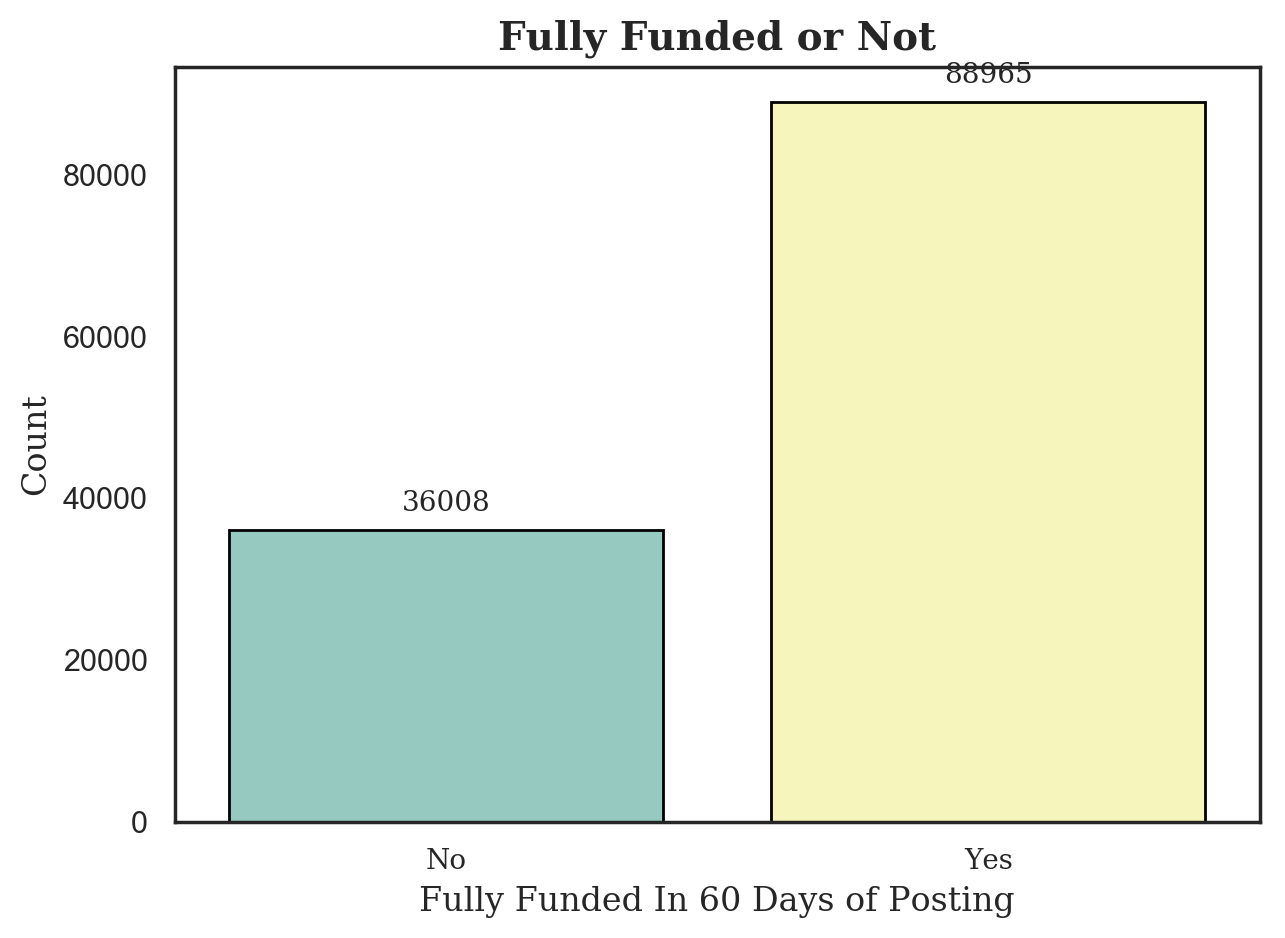

In [23]:
fig, ax = plt.subplots(figsize=[7, 5])

viz.bar_plot(ax, project, 'fully_funded', sub=False,
            labels=["Fully Funded or Not", "Fully Funded In 60 Days of Posting", "Count"],
            x_tick=[["No", "Yes"], "horizontal"])

plt.savefig(OUTPUT_DIR + 'figure-1.png')

Most projects got fully funded in 60 days. Check information about the school.

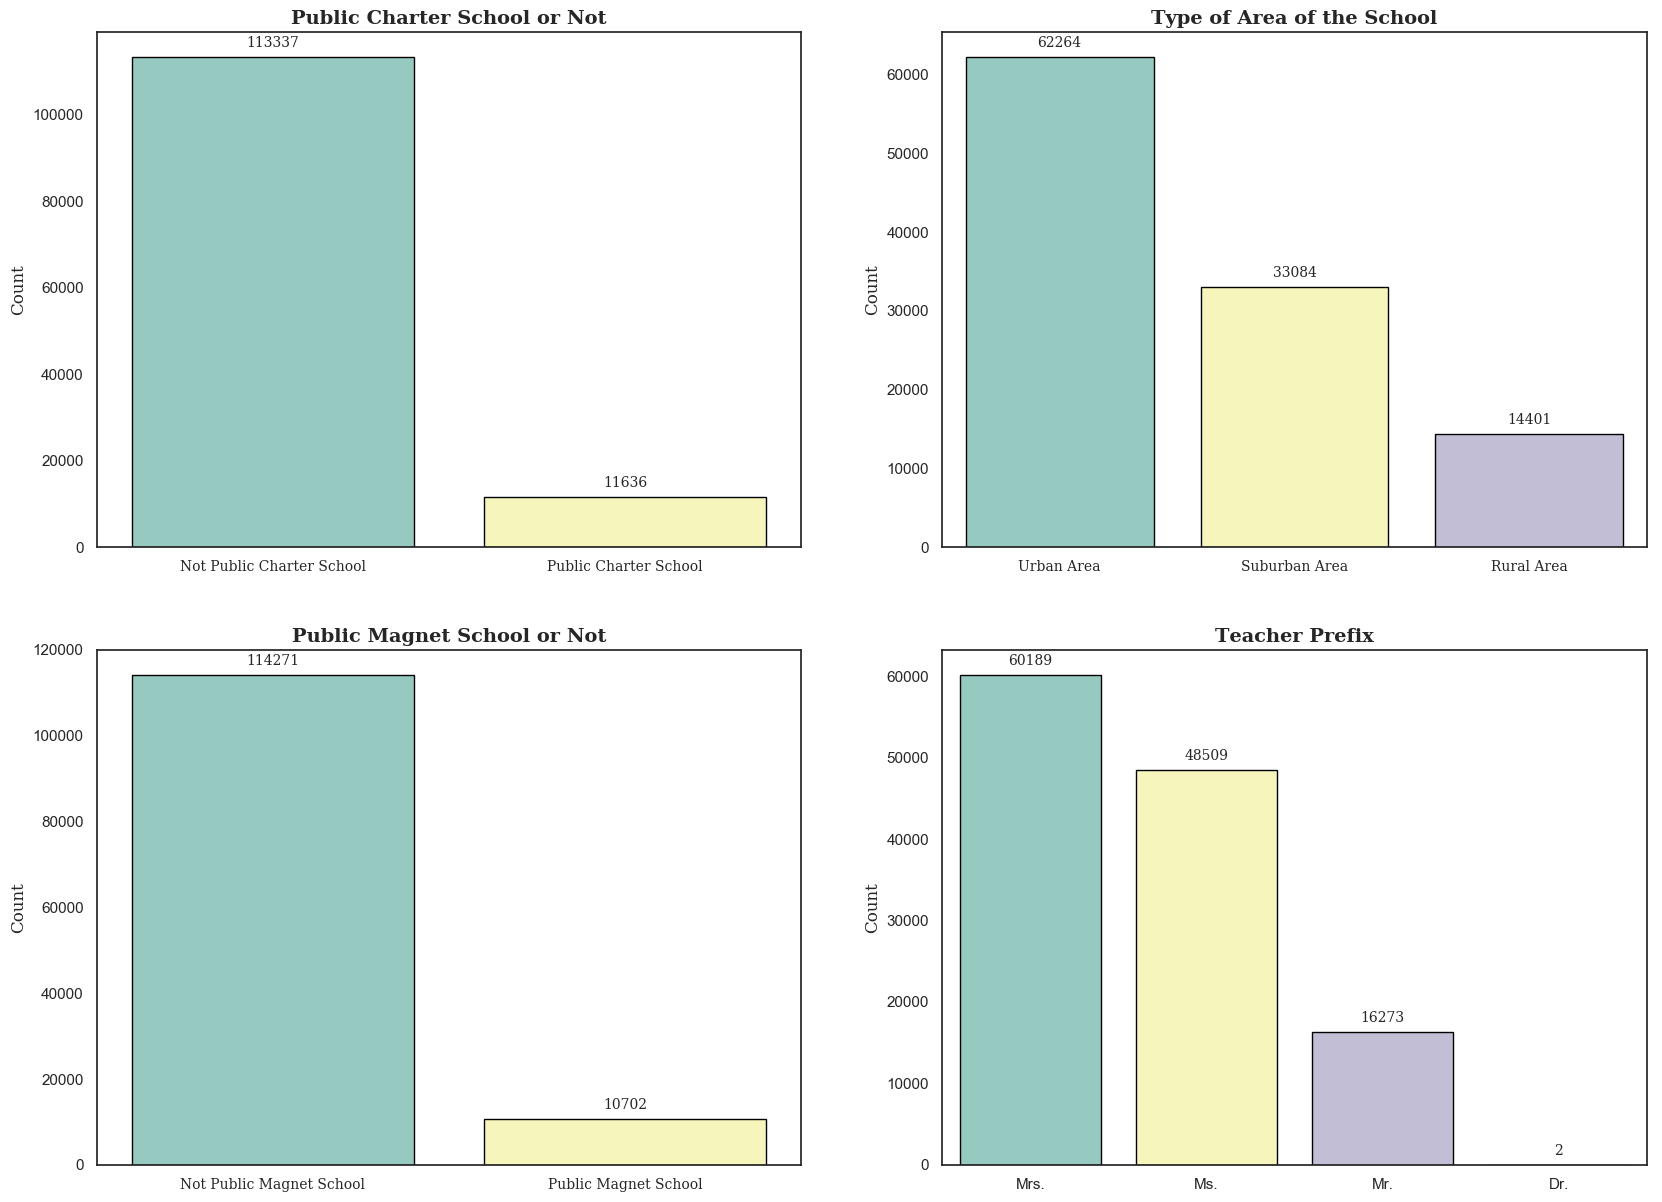

In [10]:
fig = plt.figure(figsize=[20, 15])
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

viz.bar_plot(ax1, project, 'school_charter', sub=False,
             labels=["Public Charter School or Not", "", "Count"],
             x_tick=[["Not Public Charter School", "Public Charter School"], "horizontal"])

viz.bar_plot(ax2, project, 'school_metro', sub=False,
             labels=["Type of Area of the School", "", "Count"],
             x_tick=[["Urban Area", "Suburban Area", "Rural Area"], "horizontal"])

viz.bar_plot(ax3, project, 'school_magnet', sub=False,
             labels=["Public Magnet School or Not", "", "Count"],
             x_tick=[["Not Public Magnet School", "Public Magnet School"], "horizontal"])

viz.bar_plot(ax4, project, 'teacher_prefix', sub=False,
             labels=["Teacher Prefix", "", "Count"])

plt.savefig(OUTPUT_DIR + 'figure-2.png')

Most schools are `not public charter or magnet`, and most teachers are `female`. We might consider drop `Dr.` as there are two few observations in this category. Then take a look on the students' grade and their poverty level.

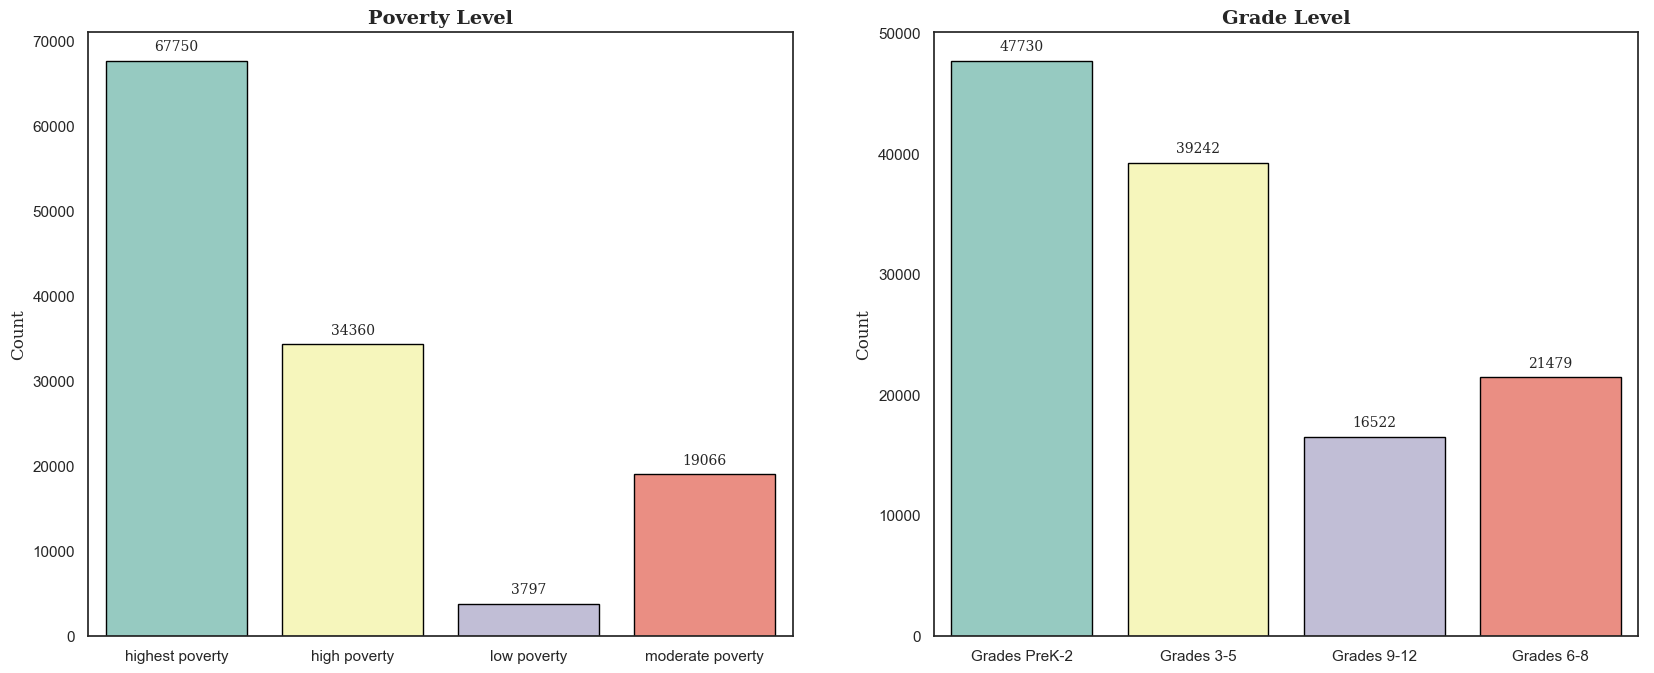

In [11]:
fig = plt.figure(figsize=[20, 8])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

viz.bar_plot(ax1, project, 'poverty_level', sub=False,
             labels=["Poverty Level", "", "Count"])

viz.bar_plot(ax2, project, 'grade_level', sub=False,
             labels=["Grade Level", "", "Count"])

plt.savefig(OUTPUT_DIR + 'figure-3.png')


A lot of schools are in areas categorized as with `highest poverty`. Also check the subjects these projects are focused on.

In [32]:
project.primary_focus_subject.value_counts()

Literacy                 37407
Mathematics              16859
Literature & Writing     16141
Special Needs             8348
Visual Arts               5869
Applied Sciences          5825
Environmental Science     4835
Health & Life Science     4185
Music                     3931
History & Geography       2701
Early Development         2618
Character Education       2249
Other                     1809
Performing Arts           1682
ESL                       1604
Social Sciences           1537
Health & Wellness         1450
Gym & Fitness             1281
College & Career Prep     1217
Foreign Languages          898
Sports                     574
Economics                  491
Extracurricular            480
Civics & Government        428
Community Service          221
Nutrition                  190
Parent Involvement         128
Name: primary_focus_subject, dtype: int64

In [13]:
project.primary_focus_area.value_counts()

Literacy & Language    56050
Math & Science         31704
Music & The Arts       11482
Applied Learning        8722
Special Needs           8348
History & Civics        5157
Health & Sports         3495
Name: primary_focus_area, dtype: int64

At last, check the project information.

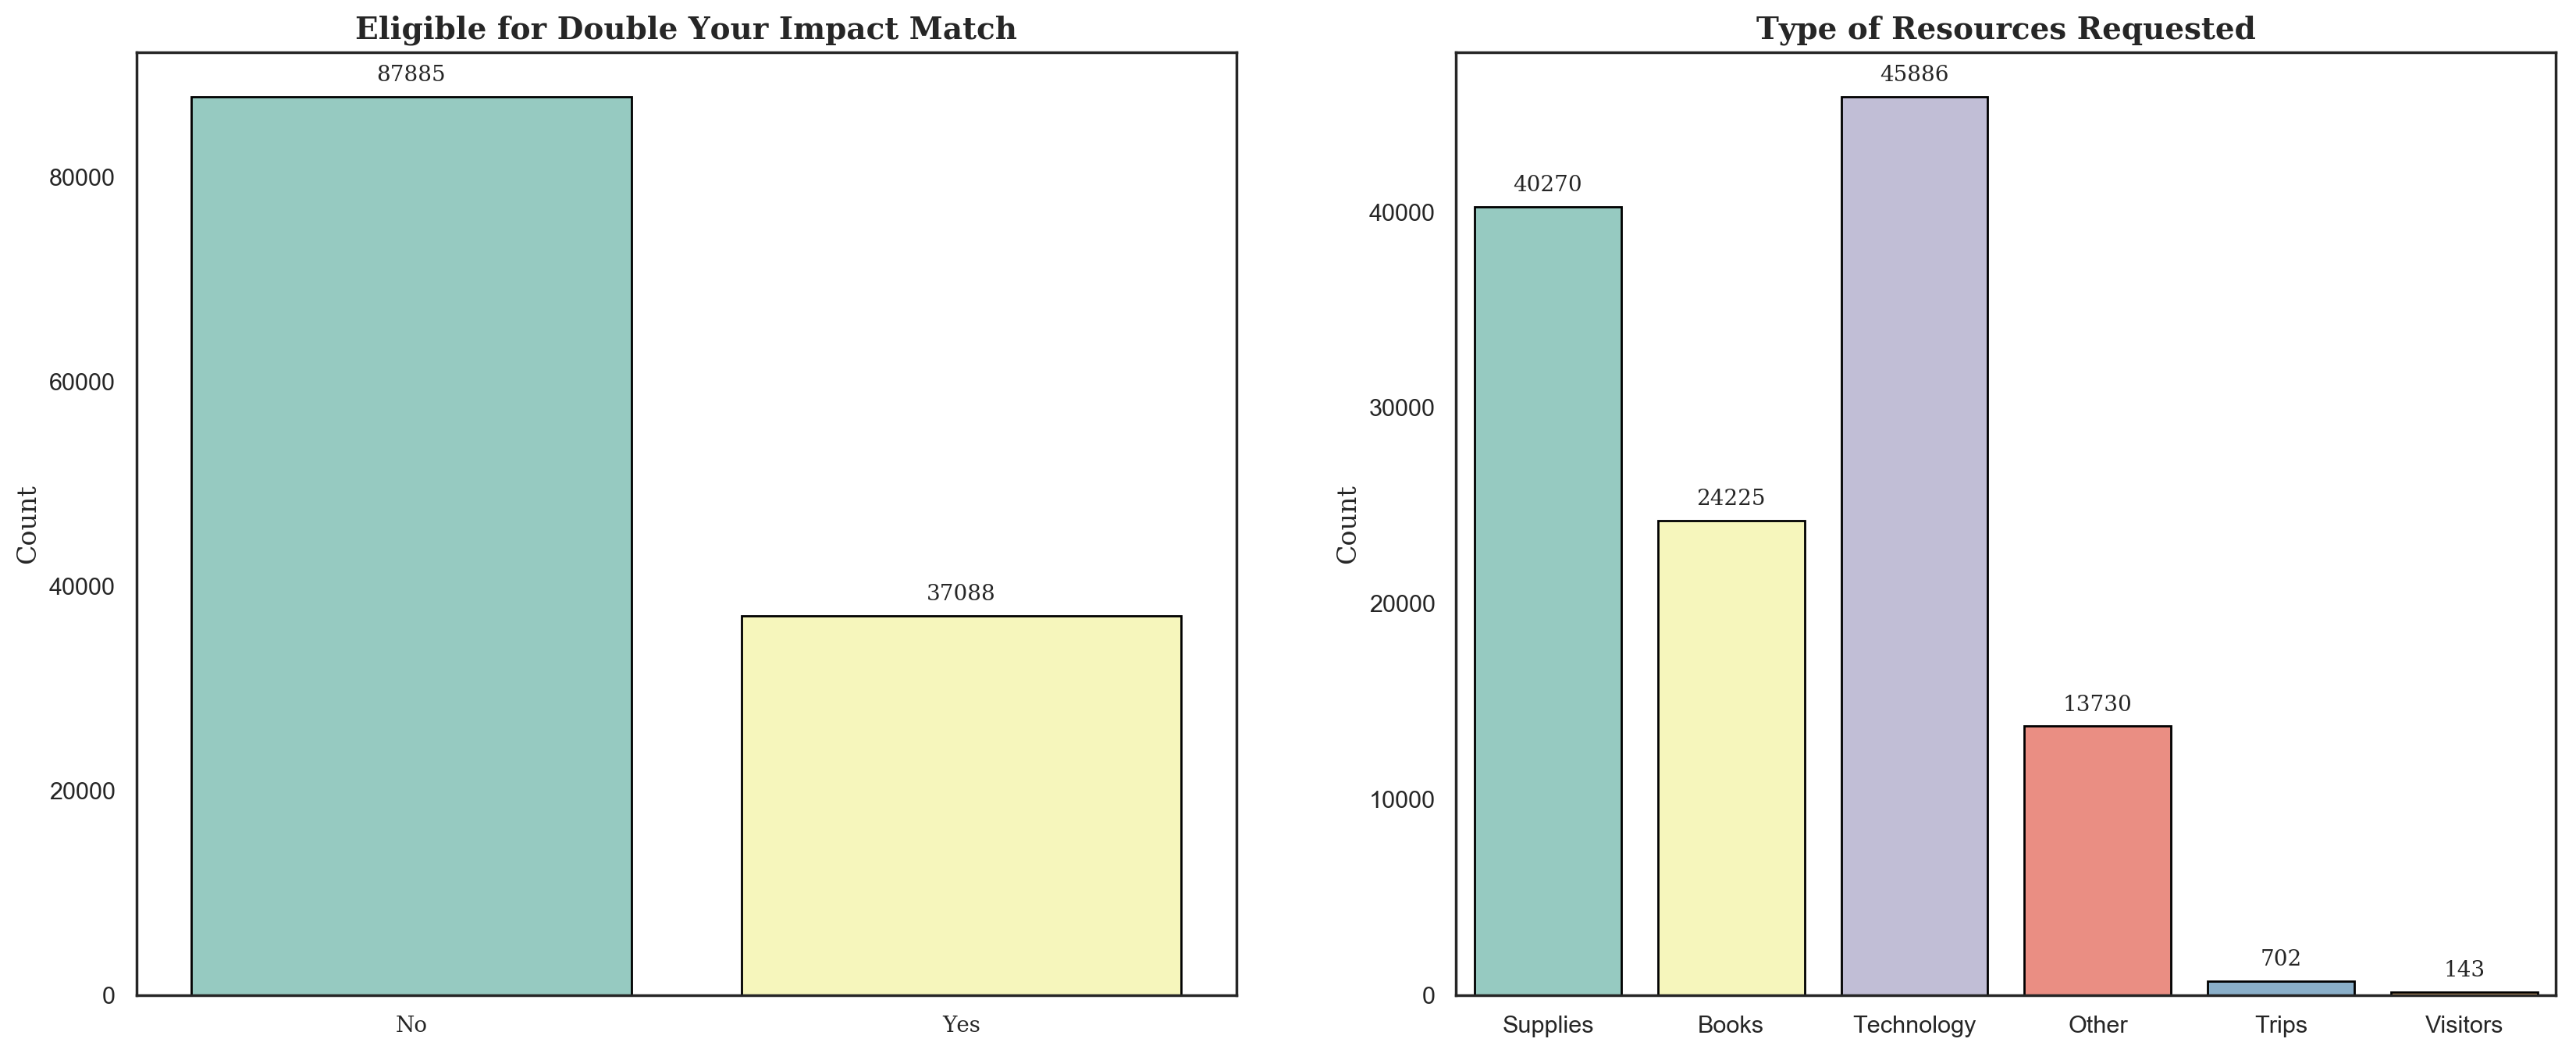

In [24]:
fig = plt.figure(figsize=[20, 8])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

viz.bar_plot(ax1, project, 'eligible_double_your_impact_match', sub=False,
             labels=["Eligible for Double Your Impact Match", "", "Count"],
             x_tick=[["No", "Yes"], "horizontal"])

viz.bar_plot(ax2, project, 'resource_type', sub=False,
             labels=["Type of Resources Requested", "", "Count"])

plt.savefig(OUTPUT_DIR + 'figure-4.png')

### 2.2 Numeric Variables

### 2.2.1 Correlation Matrix

In [20]:
project = to_binary(project)
numerics = project[NUMERICAL + BINARY_ORDINAL + TARGET]

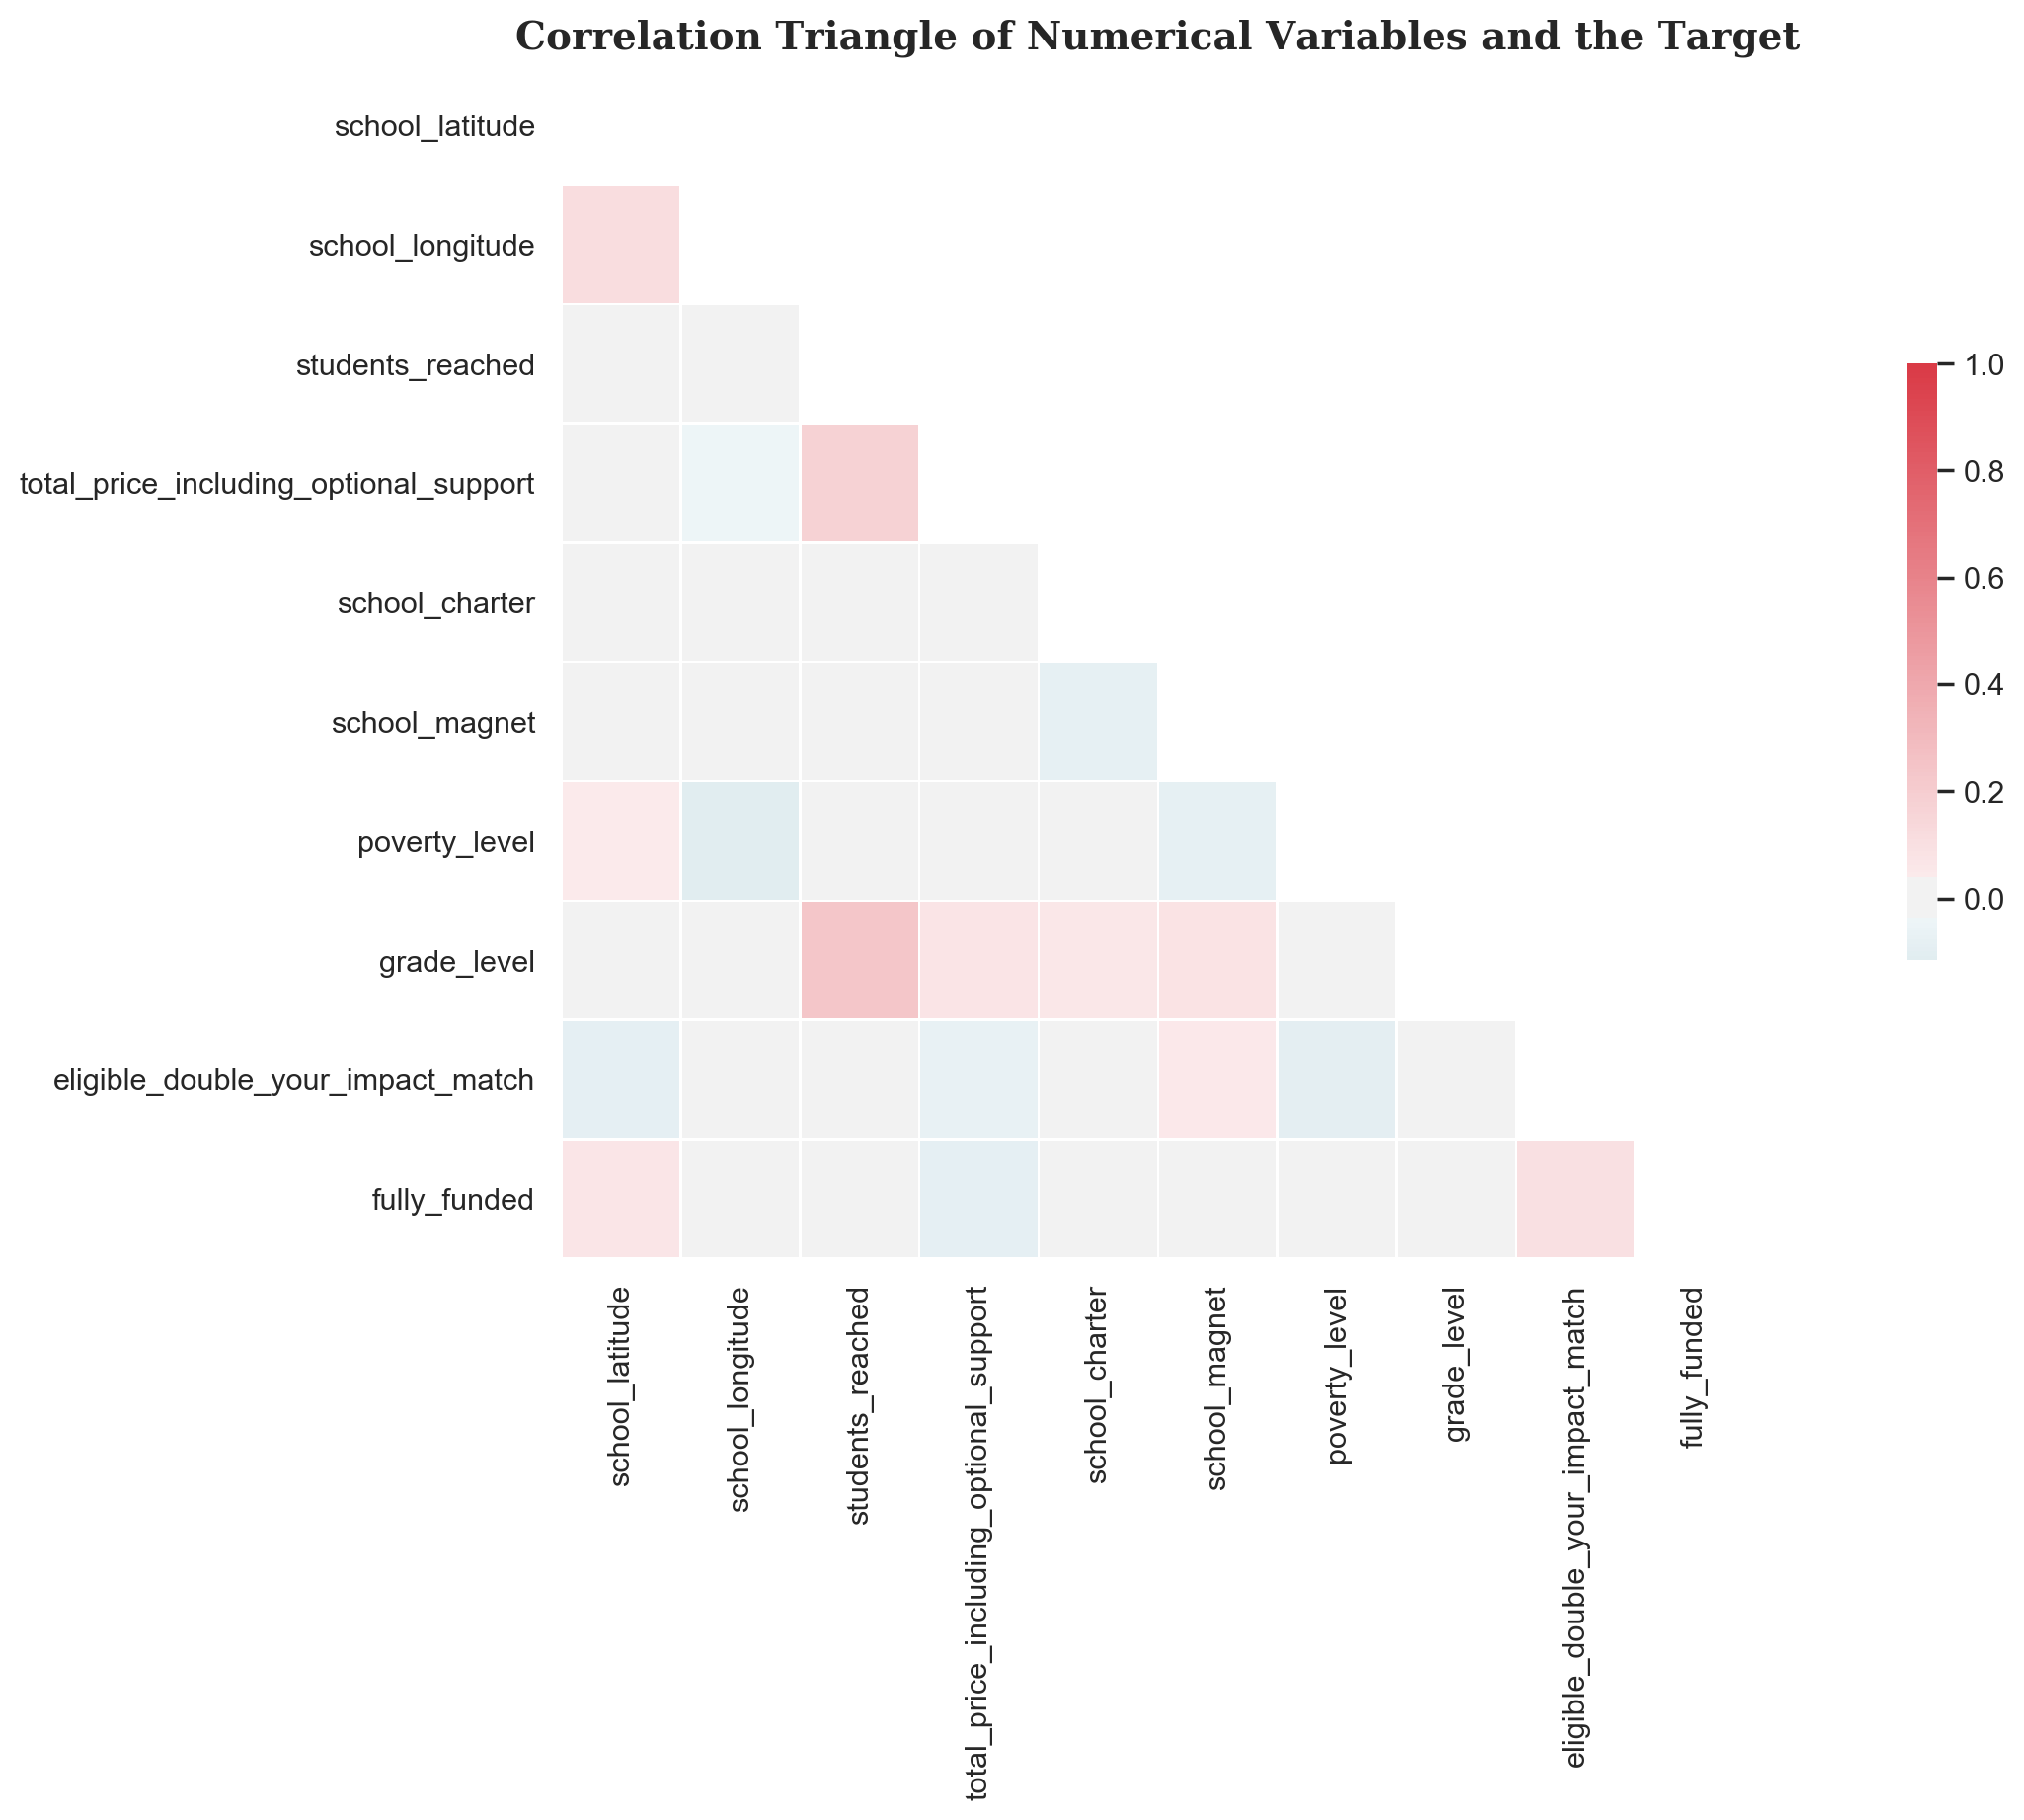

In [25]:
fig, ax = plt.subplots(figsize=[20, 8])
viz.corr_triangle(ax, numerics,
                  plot_title="Correlation Triangle of Numerical Variables and the Target")

plt.savefig(OUTPUT_DIR + 'figure-5.png')

We can see here our target, `fully_funded`, is relatively positively correlated with `school_latitude` and `eligible_double_your_impact_match`, and it's negatively correlated with `total_price_including_optional_support` as expected.

There are also some strong positive correlation between predictors, including that between `student_reached` and `grade_level`, `student_reached` and `total_price_including_optional_support` as expected, and `school_latitude` and `school_longitude`.

### 2.2.2 Box Plots

In [27]:
numerical = project[NUMERICAL]

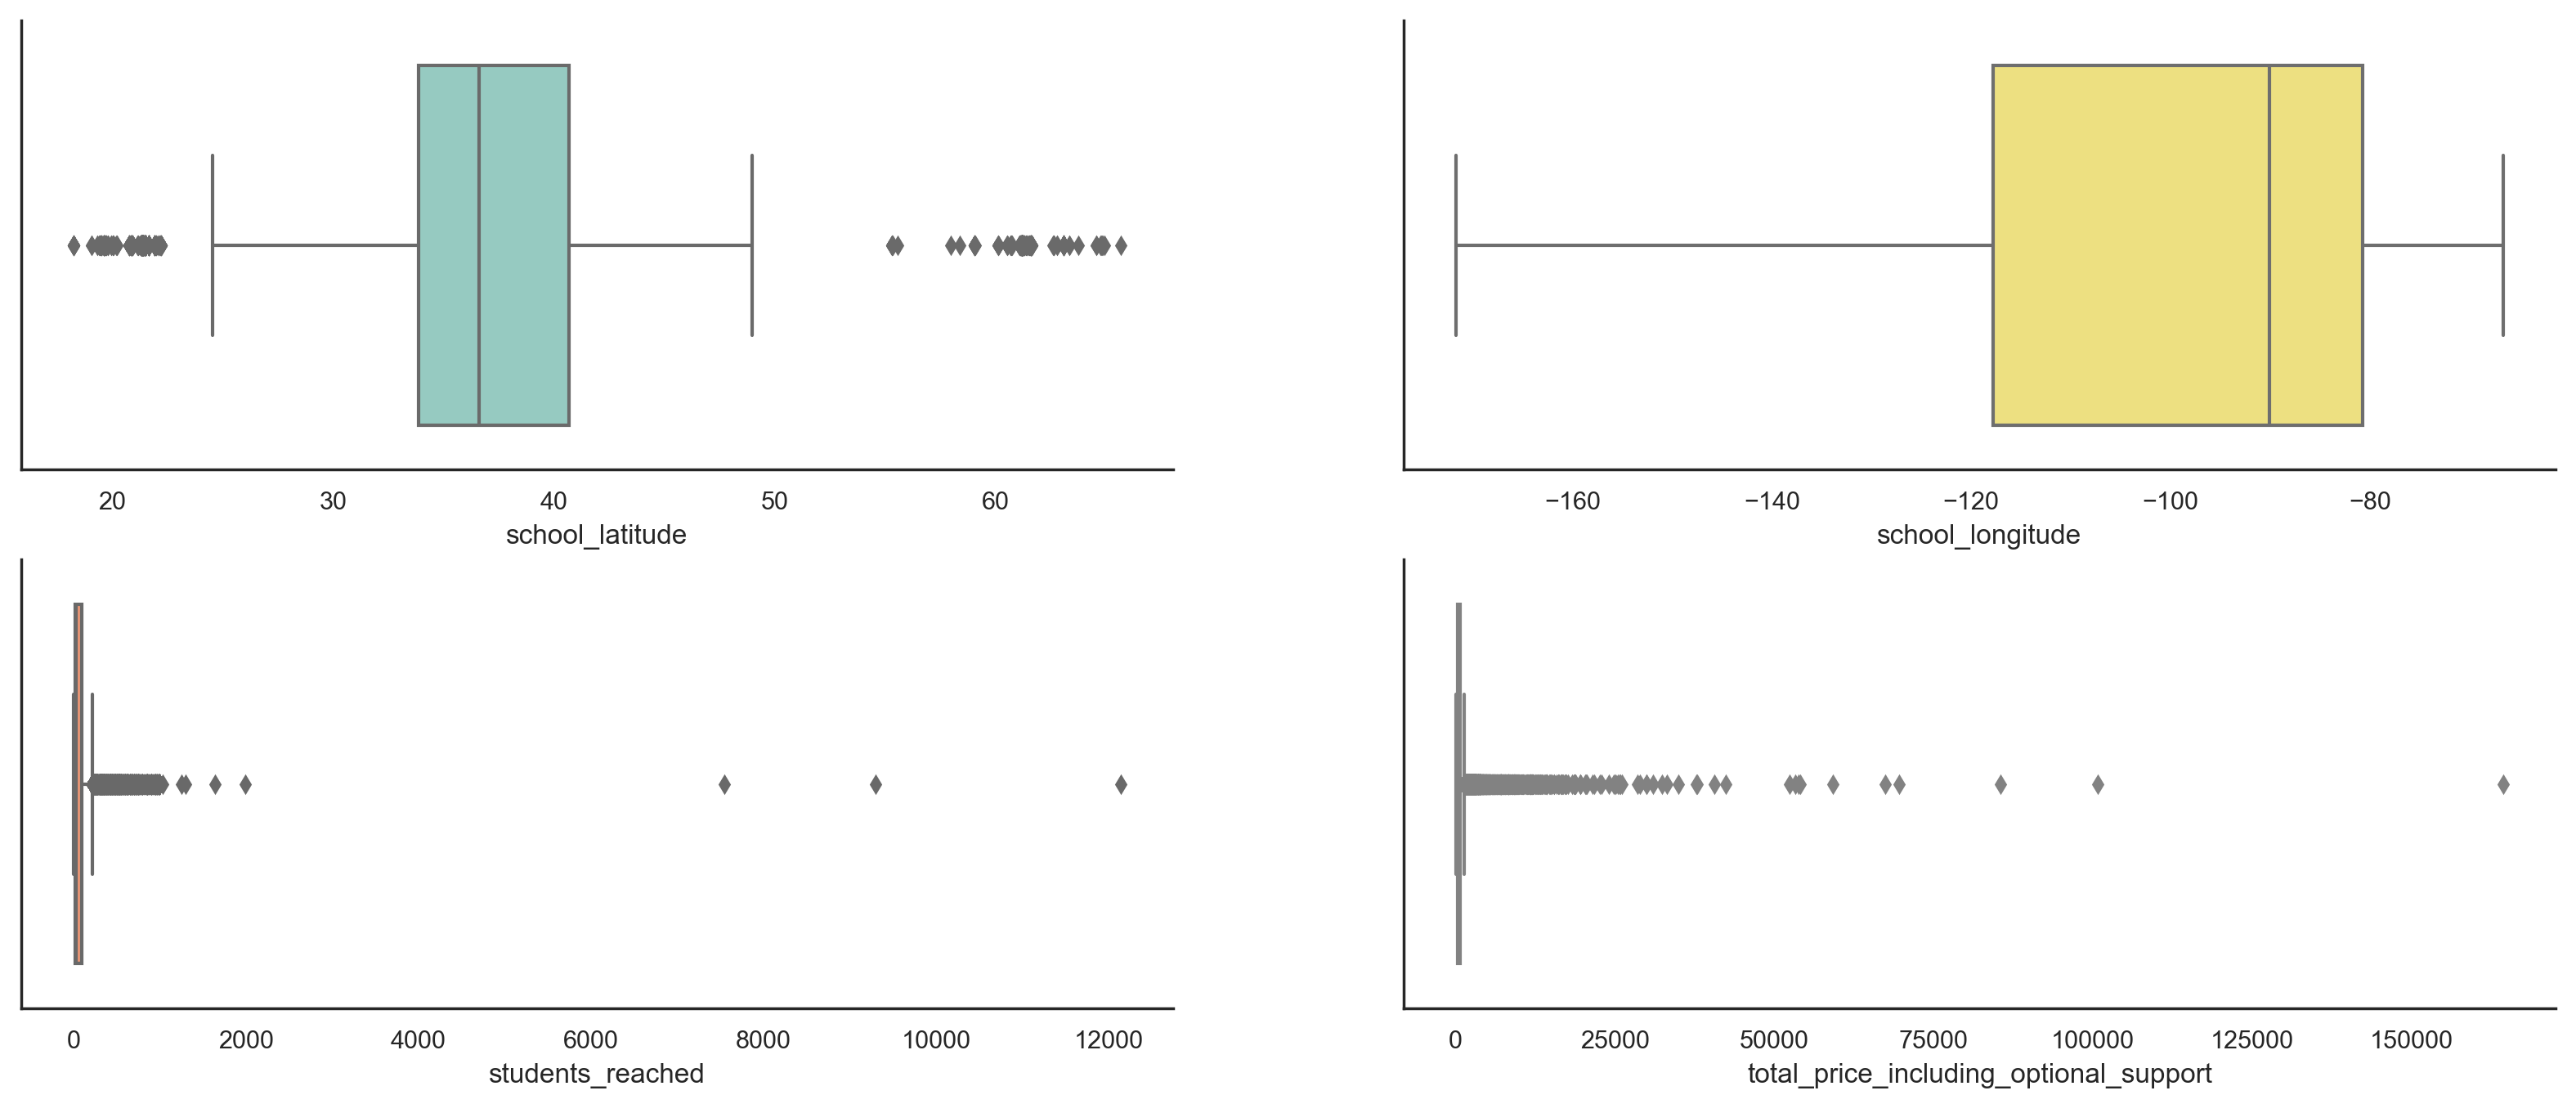

In [28]:
viz.box_plot(numerical)

plt.savefig(OUTPUT_DIR + 'figure-6.png')

It seems that we should remove outliers from `total_price_including_optional_support` and `students_reached`.

### 2.2.3 Histograms

At last, check the distribution of these numerical variables.

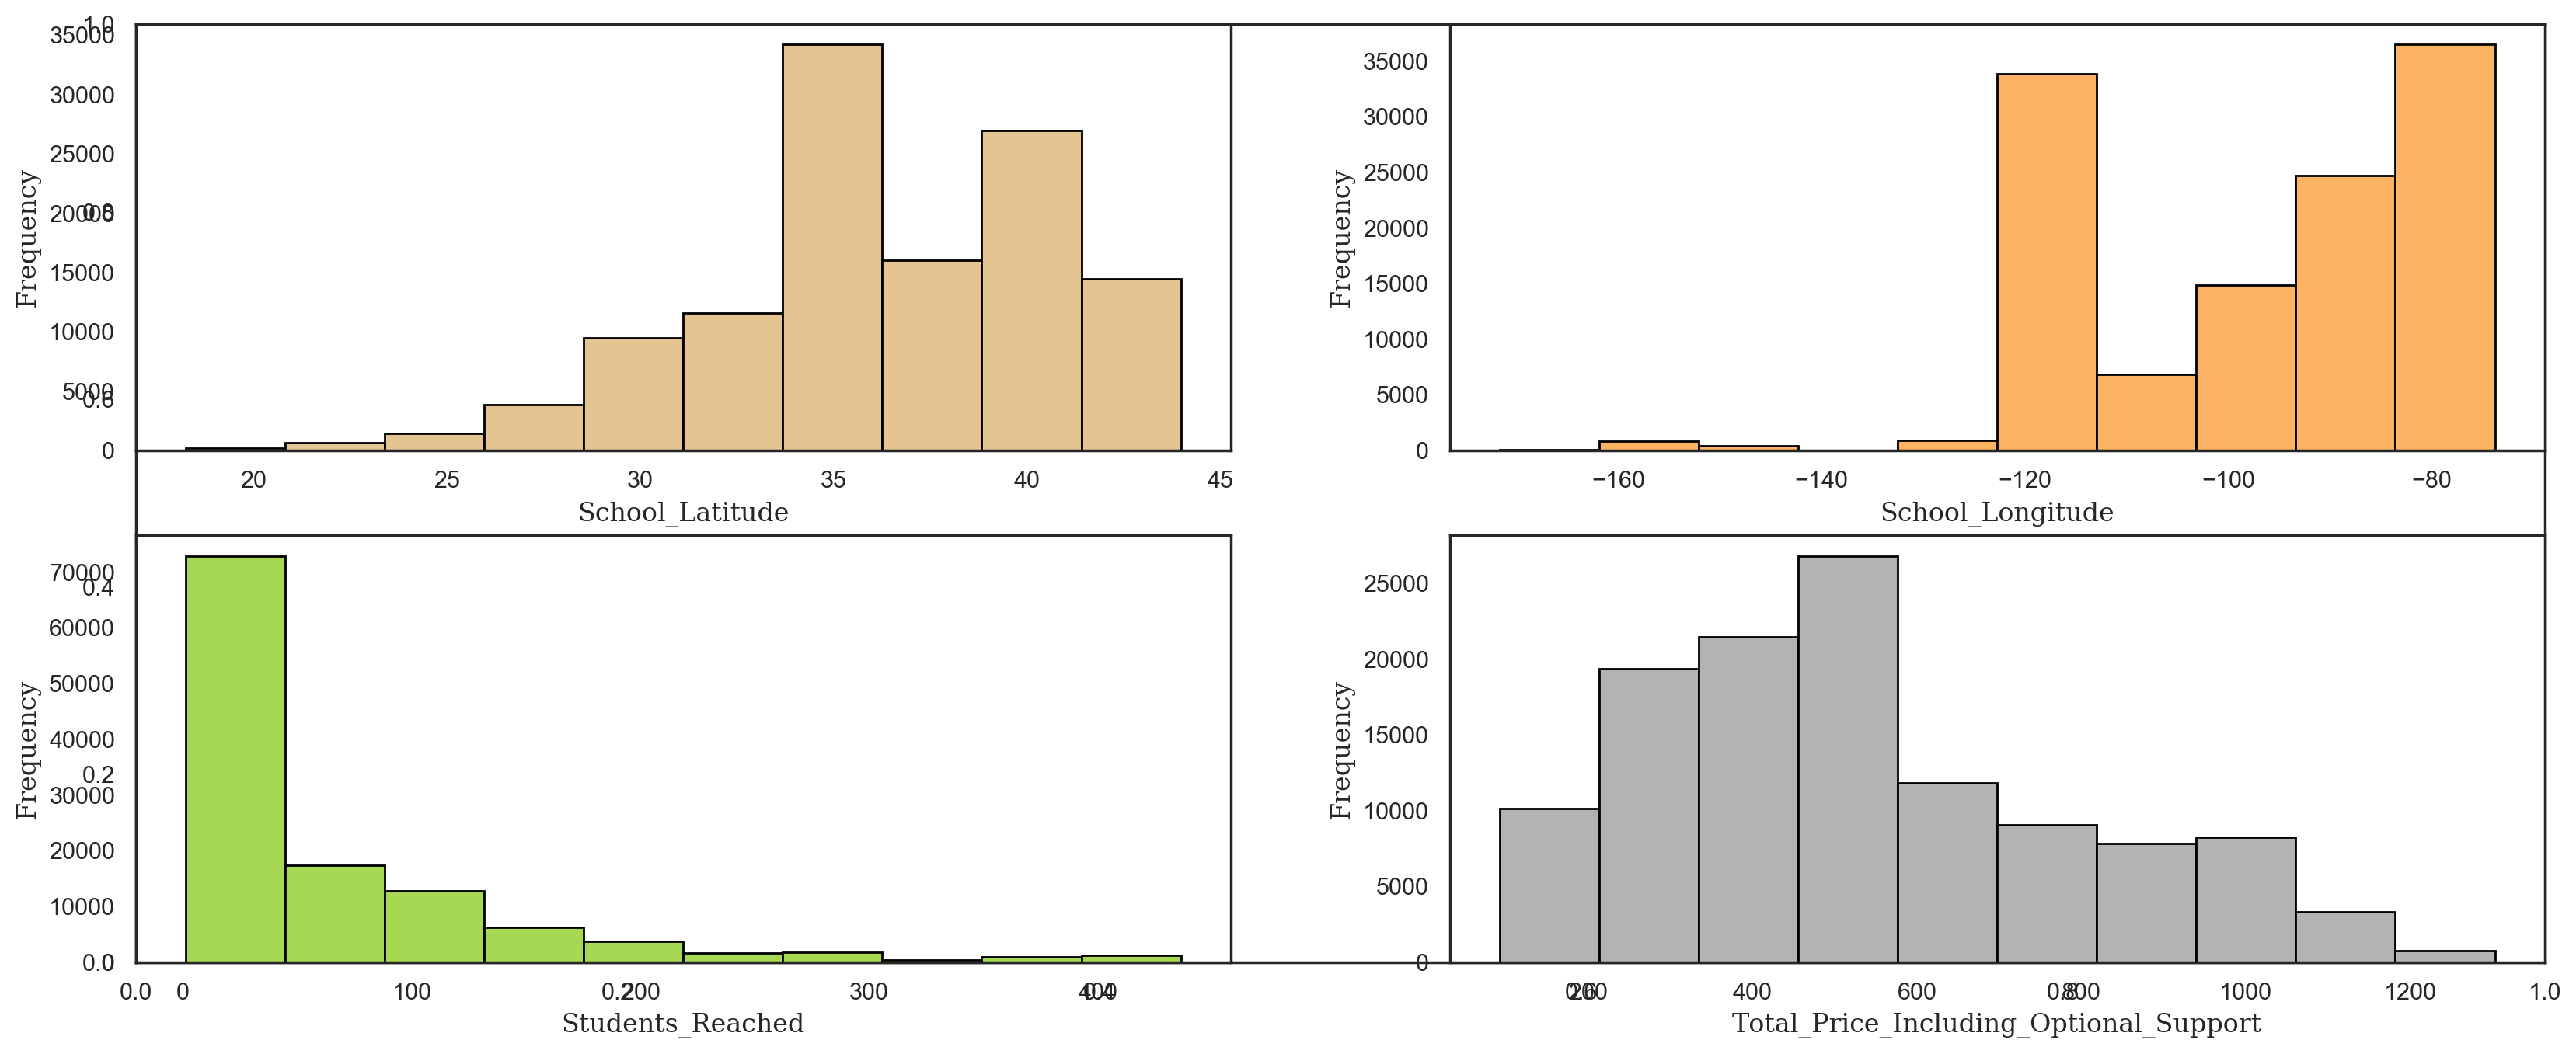

In [30]:
viz.hist_panel(numerical, cut=True)

plt.savefig(OUTPUT_DIR + 'figure-7.png')